# Loan Application Status Prediction

#### Problem Statement:

#### This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

**I have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.**

## Hypothesis:

Before starting the EDA and Machine Learning, my Hypothesis are:

1. Loan Approval depend on Credit_History, Applicant's Income and Loan Amount.
1. It does not depend on Gender or marital status

# 1- Importing Basic Libraries and Loading the dataset

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset

df=pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


The dataset above shows various numeric and categorical columns. Our Target Loan status column has 2 values Y and N which means its a **Classification Problem**.

# 2- Exploratory Data Analysis

## 2.1 Data Exploration

In [3]:
df.shape

(614, 13)

We have 614 rows and 13 columns in our dataset.

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Variable Description

The description for each feature is as follows:

1. Loan_ID — Loan ID for the Applicant applying for a loan, UNIQUE
1. Gender — Gender of the Applicant, Male & Female
1. Married — Applicant’s marital status, Yes and NO
1. Dependents — Number of dependents of the Applicant
1. Education — Applicant’s education status (Graduate/Under Graduate)
1. Self_Employed — Applicant is self-employed or not
1. ApplicantIncome — Applicant’s Income
1. CoapplicantIncome — Co-applicant’s Income
1. LoanAmount — Loan Amount in thousands
1. Loan_Amount_Term — Term of the loan in months
1. Credit_History — Applicant’s previous credit history meeting guidelines
1. Property_Area — Urban, Semi-Urban, or Rural Areas
1. Loan_Status — Loan Approval status (Target Variable)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Observations:**

* There are Null values present in the Data.
* We have 4 Float type, 1 INT type and 8 Object type datas in the set.
     * Float type: CoApplicant Income, Loan Amount, Loan Amount term and Credit History.
     * Int Type: Applicant Income
* We can replace missing datas in categorical with Mode and Numerical with mean.

In [6]:
#Lets check if there are Null values

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Observations:**
    
* We have missing values in Gender, Married, Dependents, Self_Employed, Loan Amount, Loan Amount term and Credit History.
* We can use certain techniques like checking the loan status and imputing values to missing datas.
* For eg, if loan status is Yes, then credit history will be 1 for sure.

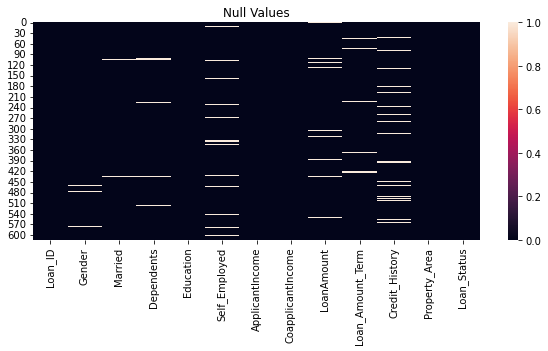

In [7]:
#Visualizeing null values
plt.figure(figsize=[10,4])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

Except for Loan_ID, Applicant Income, CoApplicant Income,Propert Area and LoanStatus all others have Missing values.

In [8]:
#checking the unique value counts of each feature

df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

We have Many categorical columns here. Numerical columns are , Applicant Income, Coapplicant Income, Loan Amount, Loan Amount term.

In [9]:
#Different types of variables are Categorical, ordinal, and numerical.

num_cols=["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]
cat_cols=["Gender", "Married", "Self_Employed", "Credit_History", "Loan_Status"]
ord_cols=["Dependents", "Education", "Property_Area"]

In [10]:
#lets check the unique values in categorical columns

for i in df[cat_cols]:
    print(df[i].value_counts())
    print('**************')
    print("               ")

Male      489
Female    112
Name: Gender, dtype: int64
**************
               
Yes    398
No     213
Name: Married, dtype: int64
**************
               
No     500
Yes     82
Name: Self_Employed, dtype: int64
**************
               
1.0    475
0.0     89
Name: Credit_History, dtype: int64
**************
               
Y    422
N    192
Name: Loan_Status, dtype: int64
**************
               


**Observations:**
    
* We have Males more than Females. Mode for Gender is Male.
* We have Married more than not married. Mode for Married is Yes
* We have more people employed under another employer than self employed. Mode is No.
* We have Credit_History as 1 than 0 and so Mode is 1
* We have more Y than N for Loan_Status.

In [11]:
#lets check the unique values in ordinal columns

for i in df[ord_cols]:
    print(df[i].value_counts())
    print('**************')
    print("               ")

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
**************
               
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
**************
               
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
**************
               


**Observations:**

* We have dependant as 0 for most of the data. 
* We have more graduate than not graduate.
* We have almost equal distribution for Semiurban , Urban and Rural

In [12]:
#lets check the unique values in Numerical columns

for i in df[num_cols]:
    print(df[i].value_counts().sort_index())
    print('**************')
    print("               ")

150      1
210      1
416      1
645      1
674      1
        ..
39147    1
39999    1
51763    1
63337    1
81000    1
Name: ApplicantIncome, Length: 505, dtype: int64
**************
               
0.000000        273
16.120001         1
189.000000        1
240.000000        1
242.000000        1
               ... 
10968.000000      1
11300.000000      1
20000.000000      2
33837.000000      1
41667.000000      1
Name: CoapplicantIncome, Length: 287, dtype: int64
**************
               
9.0      1
17.0     1
25.0     2
26.0     1
30.0     2
        ..
500.0    1
570.0    1
600.0    2
650.0    1
700.0    1
Name: LoanAmount, Length: 203, dtype: int64
**************
               
12.0       1
36.0       2
60.0       2
84.0       4
120.0      3
180.0     44
240.0      4
300.0     13
360.0    512
480.0     15
Name: Loan_Amount_Term, dtype: int64
**************
               


**Observations:**

* We have Multiple unique values.
* We can see 273 values as 0 for CoApplicant Income. This means most of the Applicants are single and no coapplicants. We cannot treat it as missing value instead i am assigning a new column as Total Income and dropping this Coapplicant column for better understanding and correlation of Dataset.
* We have Loan Amount from 9,000 to 700,000.
* We have loan amount term from 12 months to 480 months(Approx 30 years)

In [13]:
#assigning a new column as Total Income

df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [14]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


Now we have an extra column Total column. We will drop Applicant Income and Coapplicant Income after Data Visualization.

## 2.2 Imputation Technique

#### We have many missing values in the dataset. It is not advisable to drop the rows. Hence We are using Imputation techniques to fill Nan Values.

#### Gender, Married, Dependents, Self Employed, Loan Amount Term

In [15]:
#Replacing null values in categorical columns

df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])

#### Loan_Amount

In [16]:
# check the skew

df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Total_Income         5.633449
dtype: float64

Skewness is present in Loan Amount. so we take Median as Imputation technique

In [17]:
#Replacing NaN values in numerical columns

df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

In [18]:
#Again checking the NaN values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

Now all the Missing values are treated

In [19]:
#Checking the new df

df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


Our Data is clean from NaN Values and good to go.
Lets describe the data

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,145.752443,84.107233,9.0,100.25,128.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0
Total_Income,614.0,7024.705081,6458.663872,1442.0,4166.00,5416.5,7521.75,81000.0


**Observations:**

* We have alot of skewness in the dataset as mean and median are different.
* We have Loan Amount from 9,000 to 700,000.
* We have Loan Amount term from 12 months to 480 months(Approx 30 years)

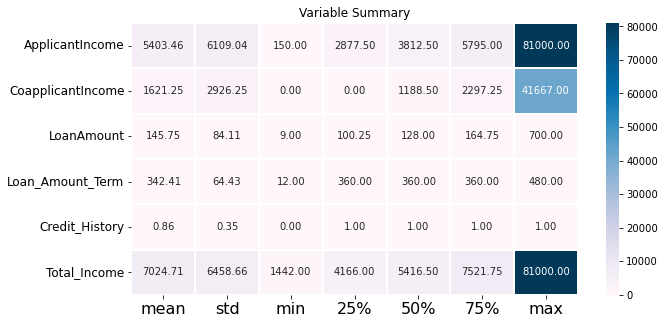

In [21]:
#Heatmap of the Describe function

plt.figure(figsize=(10,5))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.2f',cmap='PuBu')
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.title('Variable Summary')
plt.show()

We have some extreme values in the dataset.

## 2.3 Data Visualization

### a) Univariate Analysis

In [22]:
#numerical Columns are:

num_cols=["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term",
          "Total_Income"]

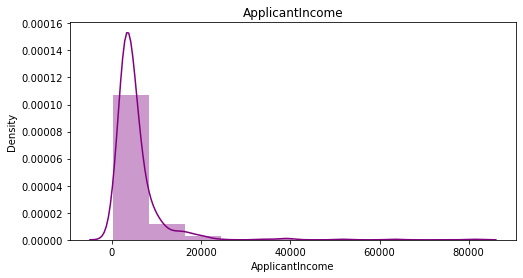

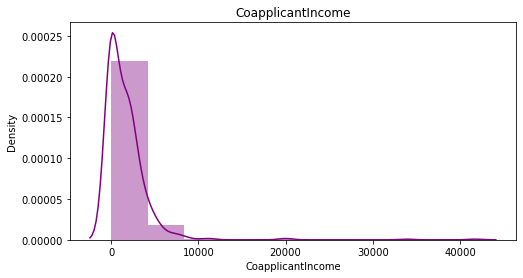

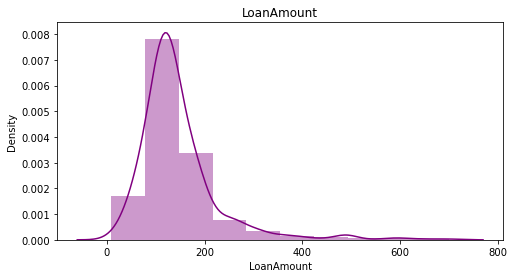

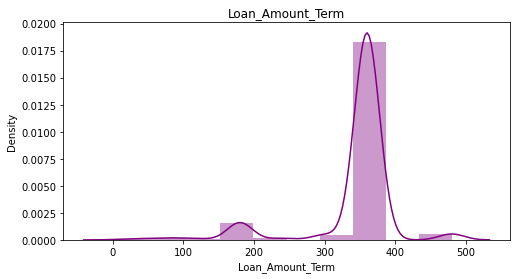

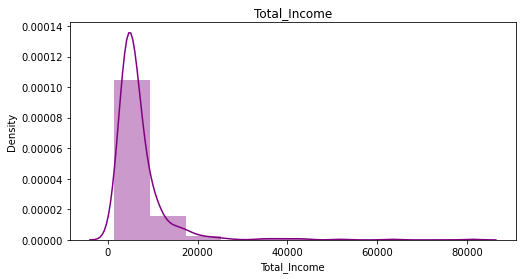

In [23]:
#Q1 What is the distribution of data for numerical columns?

for i in df[num_cols]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="purple")
    plt.title(i)
    plt.show()

We have fairly normal distribution for ApplicantIncome, Coapplicant Income, Loan Amount and slight skewness in Loan amount term and total Income.

In [24]:
#lets check Categorical columns:

cat_cols=["Gender", "Married", "Self_Employed", "Credit_History", "Loan_Status"]
ord_cols=["Dependents", "Education", "Property_Area"]

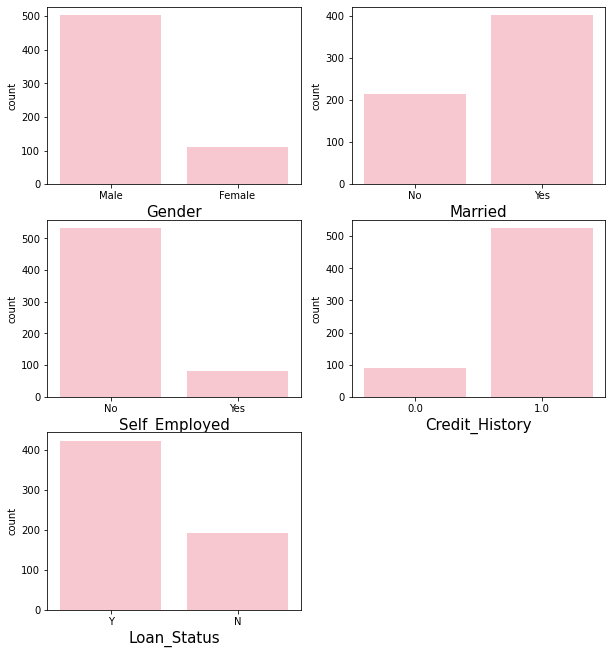

In [25]:
#Q2 What is the count of data for Categorical columns?

plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for i in df[cat_cols]:
    if plotnumber<=24 :
        ax = plt.subplot(4,2,plotnumber)
        sns.countplot(df[i],color='pink')
        plt.xlabel(i,fontsize=15)
       
    plotnumber+=1
plt.show()

* We have More male than females.
* MOre married than unmarried.
* More Employed under another employer than Self employed.
* Credit history of 1 which means elegible than 0.
* More Loan status as approved than rejected

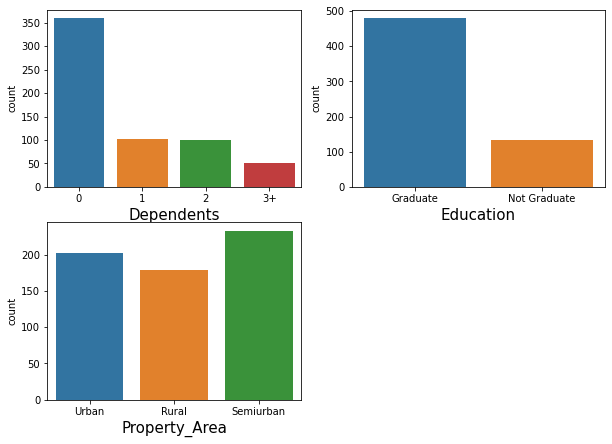

In [26]:
#Q3 What is the count of data for Ordinal columns?

plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for i in df[ord_cols]:
    if plotnumber<=24 :
        ax = plt.subplot(4,2,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=15)
       
    plotnumber+=1
plt.show()

* Most of the applicants have no dependants.
* Most Applicants have minimum qualification as graduate.
* We have mixed varieties in property area.§

### b) Bivariate Analysis

<AxesSubplot:xlabel='Gender'>

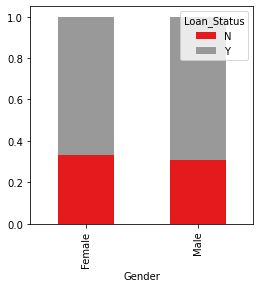

In [27]:
#Q4- What is the rate of approval in terms of Gender?

Gender=pd.crosstab(df['Gender'],df['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", 
                                                     stacked= True,figsize=(4,4), cmap='Set1')

Approval doesnt depend on Gender, Although we can slightly see that Female applicants get more approved.

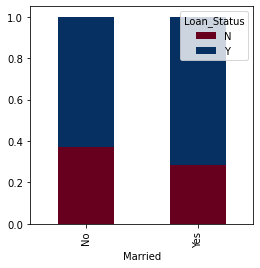

In [28]:
#Q5- Does Loan status depend on Marital status of the applicant?

Married=pd.crosstab(df['Married'],df['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4), 
                                                       stacked =True,cmap='RdBu') 
plt.show() 

It is shown that out of the Married and Not, Approval rate is more among Married. This may be because of other reasons like people tend to apply for Property loan after marriage.

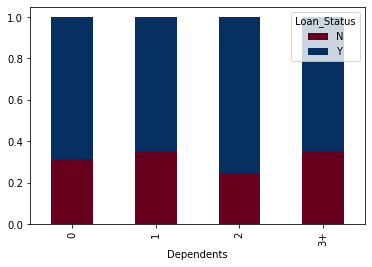

In [29]:
#Q6- What is the rate of approval for applicants with the dependents?

Dependents=pd.crosstab(df['Dependents'],df['Loan_Status']) 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked =True,cmap='RdBu')
plt.show() 

The Percentage of Approval if the dependents are 2 are more than any other number of dependents. Dependents 1 and 3+ have same rate of Approval.

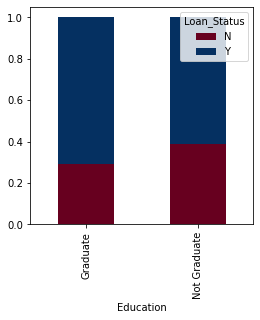

In [30]:
#Q7- Does Education effect the Approval rate of the Property Loan?
Education=pd.crosstab(df['Education'],df['Loan_Status']) 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4),stacked =True,cmap='RdBu') 
plt.show() 

Rate of approval for Graduates are more than non Graduates.

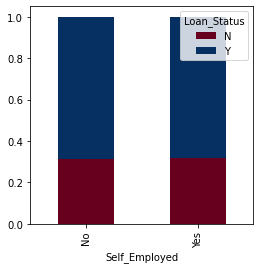

In [31]:
#Q8- What is the rate of Approval if the Applicant is self Employed?

Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4), stacked =True,cmap='RdBu')
plt.show()

The above plot of rate of approval for sef employed or not does not have any significance. both are equal. so the correlation will be very low.

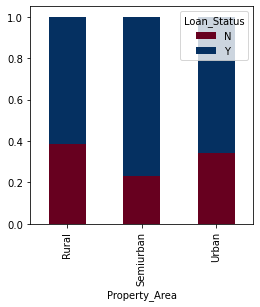

In [32]:
#Q9- Does Propert Are have effect of Loan approval?

Prop=pd.crosstab(df['Property_Area'],df['Loan_Status'])
Prop.div(Prop.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4), stacked =True,cmap='RdBu')
plt.show()

Rate of Approval for Subrural Property is more than Urban and Rural where Rural has the least rate of Approval.

**To sum up**:

* *If you are Married, have 2 dependents, Graduate and have property in SubRural Area then your Chance of Approval is more.*

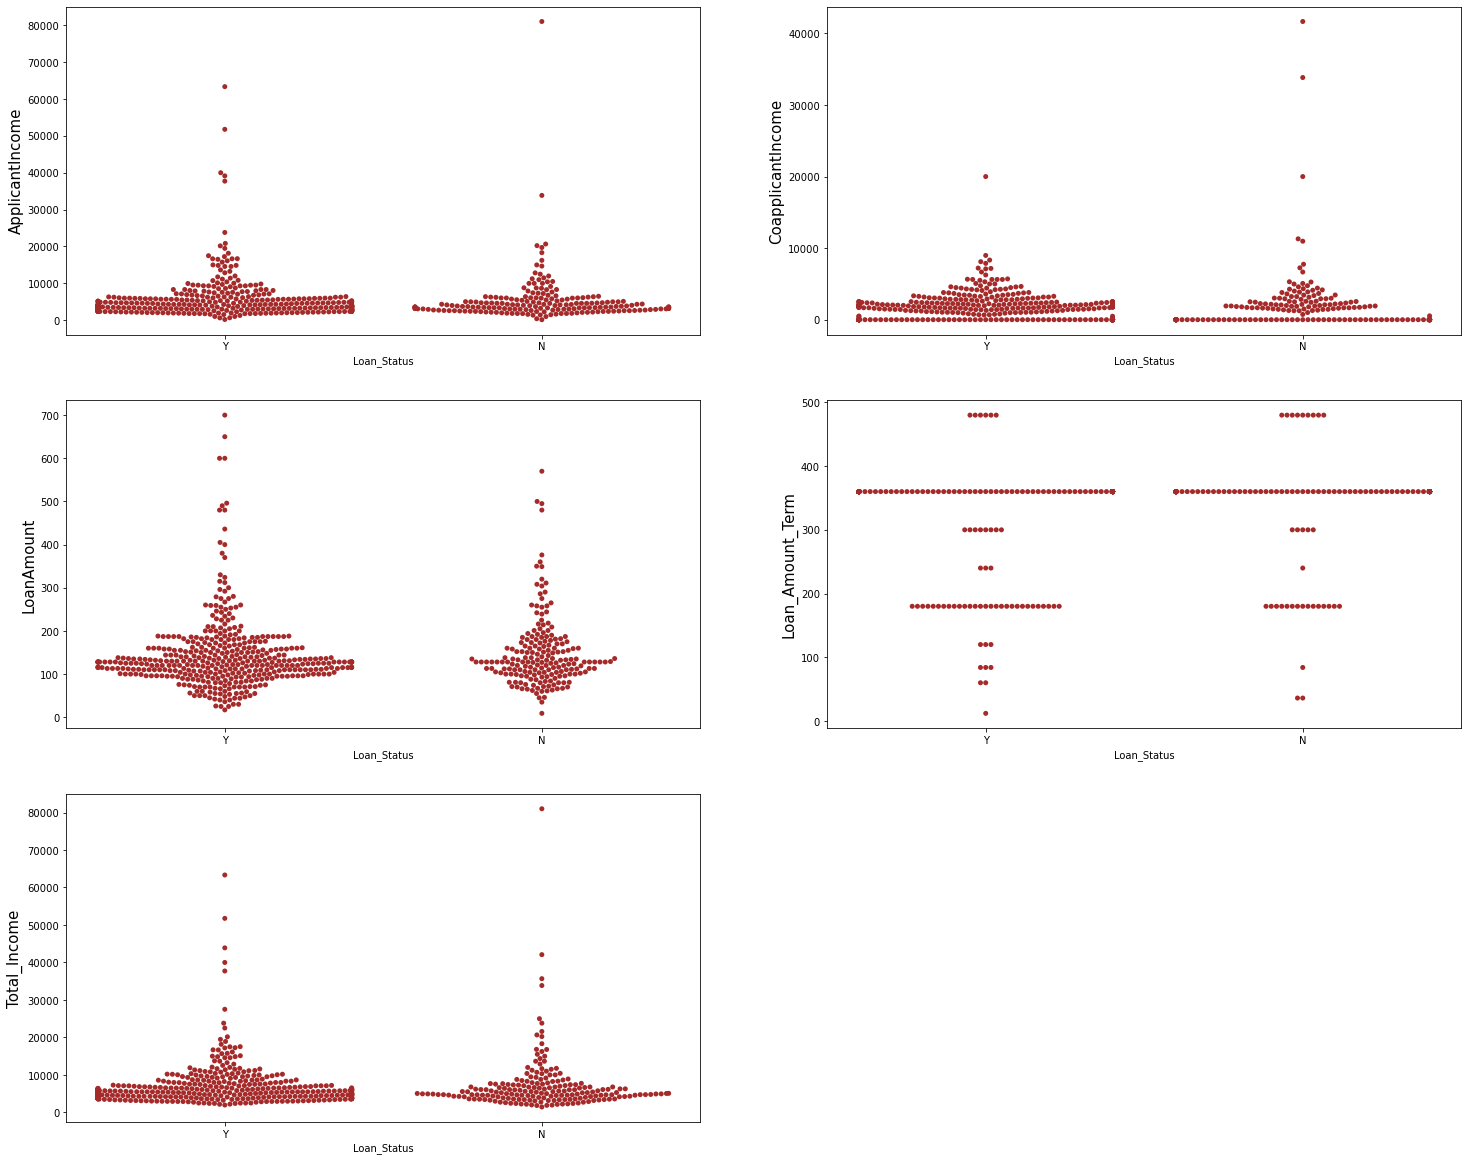

In [33]:
#Q10- What is the relationship between Numerical columns and Target variable?

plt.figure(figsize=(25,35), facecolor='white')
plotnumber = 1

for i in df[num_cols]:
    if plotnumber<=24 :
        ax = plt.subplot(5,2,plotnumber)
        sns.swarmplot(x=df.Loan_Status,y=df[i],color='brown')
        plt.ylabel(i,fontsize=15)
       
    plotnumber+=1
plt.show()

**Observations:**

* We have Outliers present in the data and so visualizing the plotting with exact amount is difficult.
* We know that, in the dataset, Yes is more than No for Loan Status.
* Applicant Income: We can see that Applicants with Income between 2000 to 6000 tends to get Approval Than any other bins. Applicant with very high income gets rejected often.
* CoApplicantIncome: The plot shows when Coapplicant income is lower the Approval rate is higher. But this is due to the fact that most of the Applicants are single and do not have coapplicant. So we are not considering this column as such.
* LoanAmount: Applicants who applied for Low Loan Amount from 100 to 150 thousands tend to get approval than others. It means, rate of approval decreases as Loan amount increases.
* Loan Amount term doesnt have specific pattern though more number of approved Loan status have term of 360 months.
* TotalIncome: Applicants with copartners or single with Income between 2000 to 9000 have the Approval rate more than other bins.

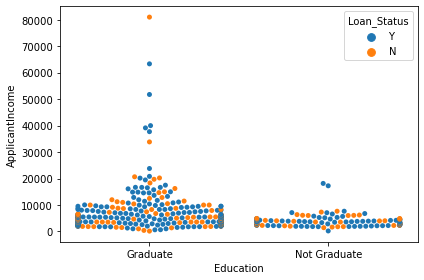

In [34]:
#Q11-Does the Applicant Income and Education have any relation with Loan_Status?

sns.swarmplot(x = "Education", y = "ApplicantIncome", hue = "Loan_Status",data=df)
plt.tight_layout()

Applicants who are graduates have more income than Non Graduates and also Rate of Approval is way higher than Non graduates.

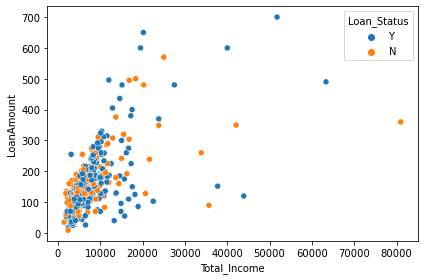

In [35]:
#Q12- Effect of Loan Amount and Total_income with Loan Status?

sns.scatterplot(x = "Total_Income", y = "LoanAmount", hue = "Loan_Status",data=df)
plt.tight_layout()

We can see that, As Total_Income increases, Loan Amount also Increases. But the rate of Approval have both Yes and No and doesnt have a clear pattern when both Income and Loan amount is plotted.

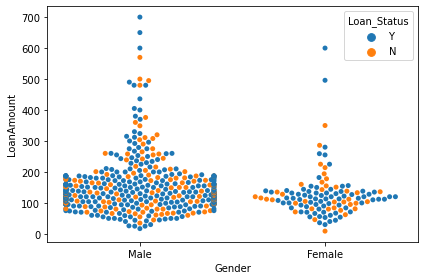

In [36]:
#Q13- Effect of Gender and Loan Amount on Status?

sns.swarmplot(x = "Gender", y = "LoanAmount", hue = "Loan_Status",data=df)
plt.tight_layout()

Males tend to apply for Higher Loan Amount than Females and rate of Approval is equal for both males and females.

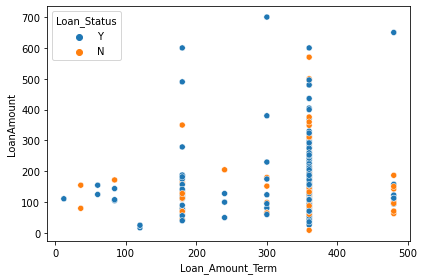

In [37]:
#Q14- Effect of Loan Amount, Term and Status?

sns.scatterplot(x = "Loan_Amount_Term", y = "LoanAmount", hue = "Loan_Status",data=df)
plt.tight_layout()

More number of Applicants have opted for 360months as term and rate of approval is also more when term is more. 

### c) Multivariate Analysis

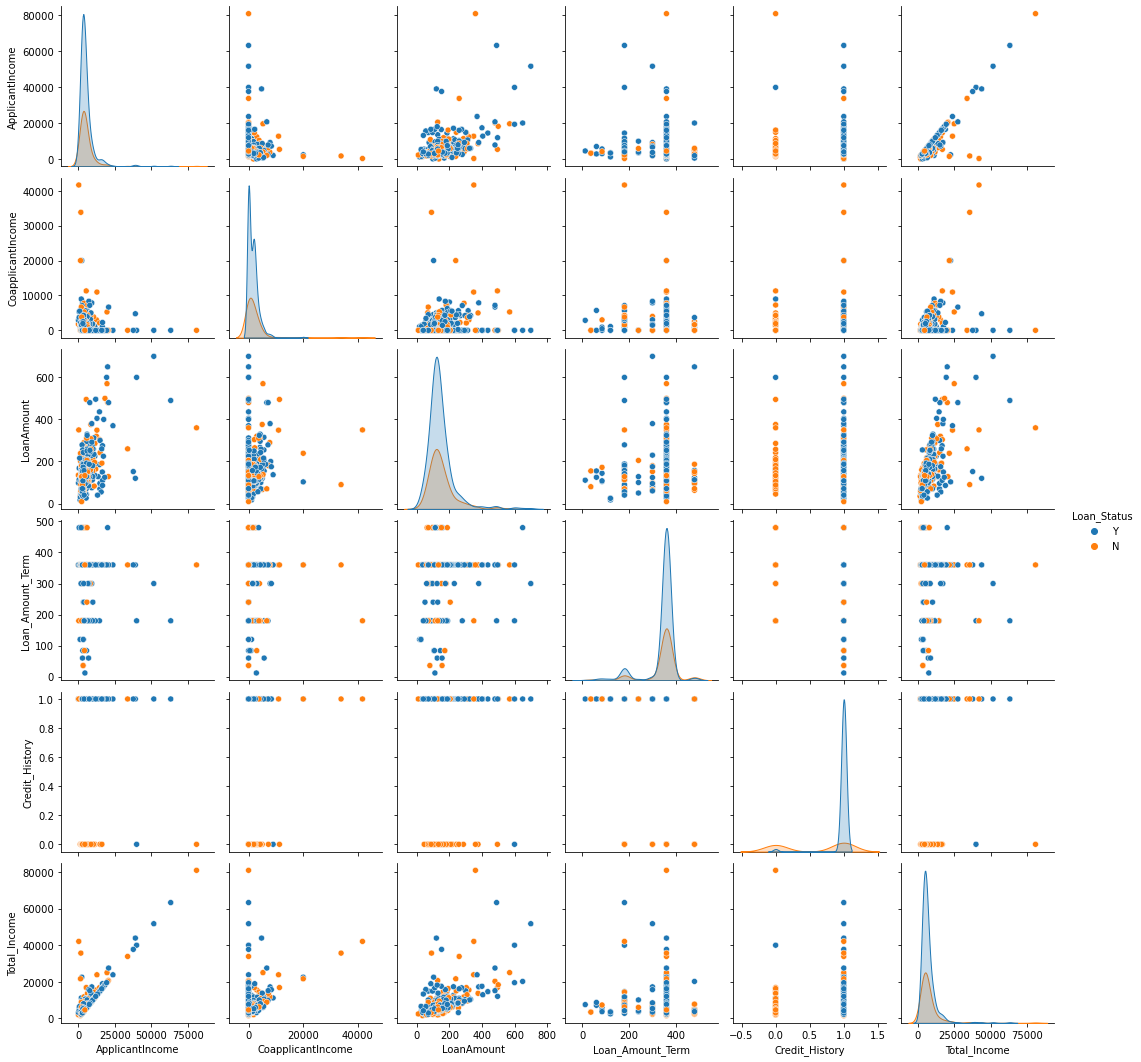

In [38]:
#pair ploting for df

sns.pairplot(df,hue="Loan_Status")

We can see Correlation with the target variable and also some outliers present in the data.

# 3- Data Cleaning and Feature Engineering

## 3.1 Outliers removal

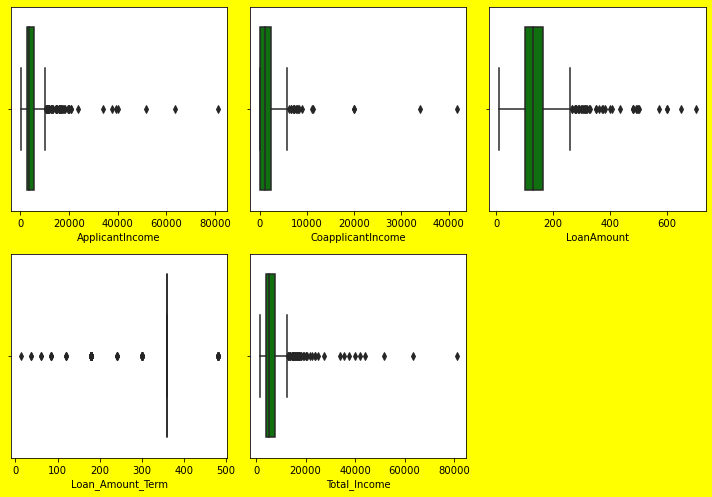

In [39]:
plt.figure(figsize=(10,10),facecolor='yellow')
graph=1 

for column in num_cols:

    plt.subplot(3,3,graph)

    sns.boxplot(df[column],color='green',orient='h')

    plt.xlabel(column,fontsize=10)

    graph+=1

    plt.tight_layout()


**We have Outliers in all numerical columns**

### Using Z-score method to remove outliers

In [40]:
from scipy.stats import zscore

out_cols=df[num_cols]

z=np.abs(zscore(out_cols))
df_new=df[(z<3).all(axis=1)]
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


In [41]:
#checking the old and new datashape

print('old data shape:',df.shape)
print('new data shape:',df_new.shape)

old data shape: (614, 14)
new data shape: (577, 14)


In [42]:
#checking the loss percentage

loss_percentage=(((614-577)/614)*100)
loss_percentage

6.026058631921824

The dataloss is below 10% so we can continue with this method

## 3.2 Skewness

In [43]:
#checking the skewness

df_new.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Total_Income         1.681856
dtype: float64

We have skewness in all numerical columns. Since Loan_Amount_Term and Credit_History are categorical columns, we need not remove skewness from those columns.

In [44]:
#Using Power transformer to remove skewness

skew_cols=["ApplicantIncome","CoapplicantIncome","LoanAmount","Total_Income"]

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df_new[skew_cols] = scaler.fit_transform(df_new[skew_cols].values)

In [45]:
#Checking the skewness again

df_new[skew_cols].skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Total_Income        -0.002577
dtype: float64

Skewness is removed completely

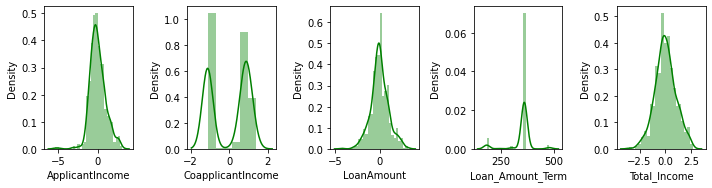

In [46]:
#checking the skewness plot

plt.figure(figsize=(10,10))
graph=1 

for column in df_new[num_cols]:

    plt.subplot(4,5,graph)

    sns.distplot(df_new[column],color='green')

    plt.xlabel(column,fontsize=10)

    graph+=1

    plt.tight_layout()

We will drop the columns Applicant and Coapplicant Income as we have Total_Income column

## 3.3 Encoding

In [47]:
cat_cols=["Gender", "Married","Dependents","Education", "Self_Employed", "Property_Area",
          "Loan_Status"]

In [48]:
#Encoding the categorical columns:

from sklearn.preprocessing import LabelEncoder
lencode = {}

for column in cat_cols:
    lencode[column] = LabelEncoder()
    df_new[column] = lencode[column].fit_transform(df_new[column])

In [49]:
#Checking the coded cols:

df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,1,0,0,0,0,0.681780,-1.122446,0.000771,360.0,1.0,2,1,0.196237
1,LP001003,1,1,1,0,0,0.234783,0.744117,0.000771,360.0,1.0,0,0,0.285858
2,LP001005,1,1,0,0,1,-0.527201,-1.122446,-1.437336,360.0,1.0,2,1,-1.405629
3,LP001006,1,1,0,1,0,-0.791972,0.895786,-0.153545,360.0,1.0,2,1,-0.185746
4,LP001008,1,0,0,0,0,0.728848,-1.122446,0.238260,360.0,1.0,2,1,0.252679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,-0.587375,-1.122446,-1.293791,360.0,1.0,0,1,-1.493667
610,LP002979,1,1,3,0,0,0.035386,-1.122446,-2.332692,180.0,1.0,0,1,-0.622195
611,LP002983,1,1,1,0,0,1.281658,0.173344,1.845015,360.0,1.0,2,1,0.946187
612,LP002984,1,1,2,0,0,1.164426,-1.122446,0.976055,360.0,1.0,2,1,0.756080


We have encoded the categorical columns.

## 3.4 Correlation

In [50]:
#Checking the correlation of variables

df_new.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408,0.191128
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026,0.182047
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872,0.068765
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658,-0.177544
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525,0.189930
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484,0.739140
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344,0.238764
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609,0.634927
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291,-0.089998
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936,0.031675


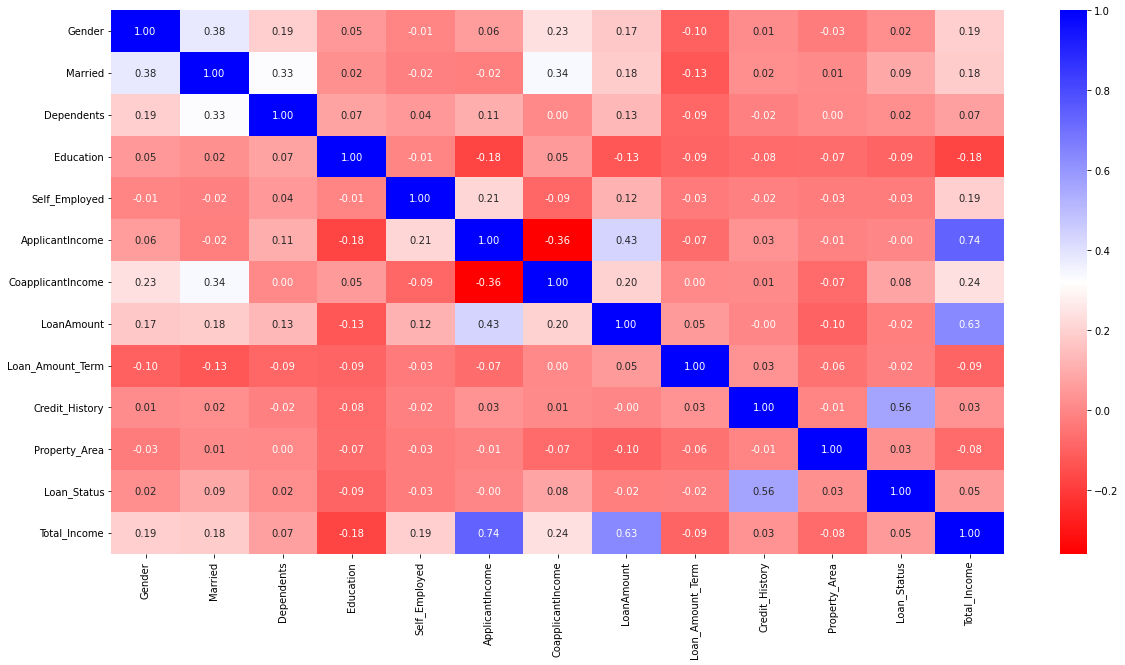

In [51]:
#Correlation Heat map

corr = df_new.corr()
plt.figure(figsize=(20,10), facecolor='white')
sns.heatmap(corr, annot=True,cmap='bwr_r',fmt='.2f')
plt.show()

**Observations:**

* We can see extreme correlations both positive and Negative.
* Multicoliinearity is present with Total Income and Applicant Income and also Loan Amount. 
* The Highest correlation of our target variable is with Credit History. As we know only if Credit history is positive the applicant gets the loan approval.
* We have multicollinearity among Applicant Income and Coapplicant Income.
* Our target is least Correlated with Applicant Income.

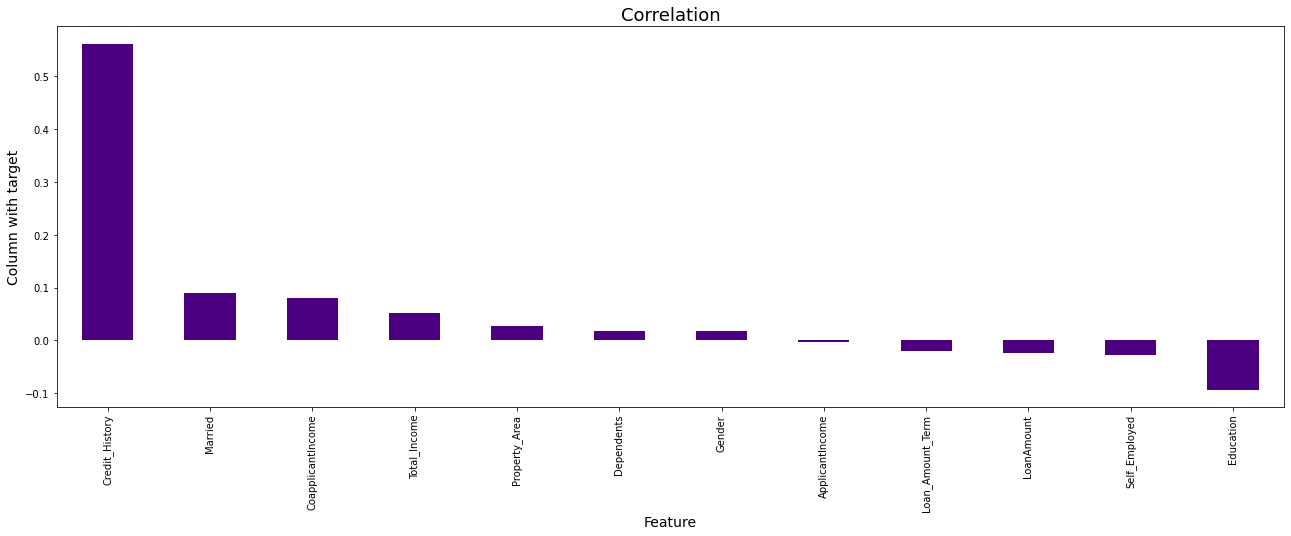

In [52]:
#Visualization of correlation:

plt.figure(figsize=(22,7))
df_new.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='indigo')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("Column with target",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()

The plot shows that Applicant Income is the least corelated and Coapplicant income as moderately correlated. As we explained this phenomena before, that most of the Applicants are single and thats why the correlation is more. I will remove both Applicant Income and Coapplicant Income and Keep Total Income. Also I will remove Loan Id as its a unique Identification number and does not have any effect on my model.

In [53]:
#Droping less correlated column

df_new = df_new.drop(["ApplicantIncome"],axis=1)
df_new = df_new.drop(["CoapplicantIncome"],axis=1)
df_new = df_new.drop(["Loan_ID"],axis=1)

In [54]:
df_new.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,0,0.000771,360.0,1.0,2,1,0.196237
1,1,1,1,0,0,0.000771,360.0,1.0,0,0,0.285858
2,1,1,0,0,1,-1.437336,360.0,1.0,2,1,-1.405629
3,1,1,0,1,0,-0.153545,360.0,1.0,2,1,-0.185746
4,1,0,0,0,0,0.238260,360.0,1.0,2,1,0.252679


#### Our data is clean from Outliers, Skewness and categorical data is encoded.

## 3.5 Data Splitting

In [55]:
x = df_new.drop("Loan_Status",axis=1)
y = df_new["Loan_Status"]

In [56]:
x.shape

(577, 10)

In [57]:
y.shape

(577,)

In [58]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,1,0,0,0,0,0.000771,360.0,1.0,2,0.196237
1,1,1,1,0,0,0.000771,360.0,1.0,0,0.285858
2,1,1,0,0,1,-1.437336,360.0,1.0,2,-1.405629
3,1,1,0,1,0,-0.153545,360.0,1.0,2,-0.185746
4,1,0,0,0,0,0.238260,360.0,1.0,2,0.252679


In [59]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

## 3.6 Standardization

In [60]:
from sklearn.preprocessing import StandardScaler

ssc=StandardScaler()

x= pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

In [61]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.000771,0.230853,0.418513,1.227472,0.196237
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.000771,0.230853,0.418513,-1.306522,0.285858
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-1.437336,0.230853,0.418513,1.227472,-1.405629
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.153545,0.230853,0.418513,1.227472,-0.185746
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.238260,0.230853,0.418513,1.227472,0.252679


## 3.7 SMOTE Technique

1    398
0    179
Name: Loan_Status, dtype: int64


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

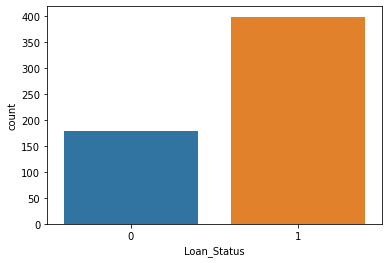

In [62]:
#Checking the count of Loan_Status

print(y.value_counts())
sns.countplot(y)

We have Imbalanced data

In [63]:
#Importing SMOTE and using it to balance

from imblearn.over_sampling import SMOTE

smt = SMOTE()
x,y = smt.fit_resample(x,y)

1    398
0    398
Name: Loan_Status, dtype: int64


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

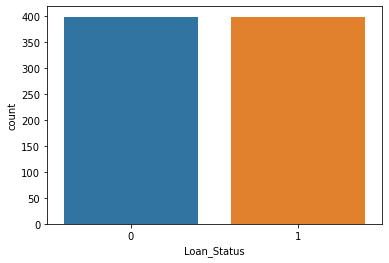

In [64]:
#Rechecking the count of Loan_Status

print(y.value_counts())
sns.countplot(y)

Our data is balanced now

## 3.8 VIF/Multicollinearity

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [66]:
vif_calc()

   VIF Factor          features
0    1.179961            Gender
1    1.327577           Married
2    1.152525        Dependents
3    1.100388         Education
4    1.057889     Self_Employed
5    1.937761        LoanAmount
6    1.098462  Loan_Amount_Term
7    1.020650    Credit_History
8    1.024906     Property_Area
9    2.021746      Total_Income


#### Our dataset is pretty Clean and no Multicollinearity

# 4- Model Building

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score, confusion_matrix, \
precision_score, f1_score, accuracy_score, classification_report

### a) Logistic Regression

In [68]:
#Finding the Best Random State

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.7698744769874477  on Random_state  68


In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

In [70]:
lr=LogisticRegression()

lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_lr=lr.predict(x_test)
print('Accuracy score of Logistic Regression is:')
print(accuracy_score(y_test,pred_lr))
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

Accuracy score of Logistic Regression is:
0.7698744769874477
[[ 53  49]
 [  6 131]]
              precision    recall  f1-score   support

           0       0.90      0.52      0.66       102
           1       0.73      0.96      0.83       137

    accuracy                           0.77       239
   macro avg       0.81      0.74      0.74       239
weighted avg       0.80      0.77      0.75       239



In [71]:
#HyperParameter Tuning of LR

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

lr_grid_param={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'penalty':['none', 'elasticnet', 'l1', 'l2'],
               'C':[0.001, 0.01, 0.1, 1, 10, 100]}

gd_sr=GridSearchCV(estimator=lr,param_grid=lr_grid_param,cv=5,verbose=0)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.7022562893081761


In [72]:
#Reinstating the tuned parameters:


lr=LogisticRegression(C=0.01,solver='liblinear',penalty='l2')

lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print('Accuracy score of Logistic Regression is:')
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy score of Logistic Regression is:
0.7615062761506276
[[ 52  50]
 [  7 130]]
              precision    recall  f1-score   support

           0       0.88      0.51      0.65       102
           1       0.72      0.95      0.82       137

    accuracy                           0.76       239
   macro avg       0.80      0.73      0.73       239
weighted avg       0.79      0.76      0.75       239



Our score has not improved

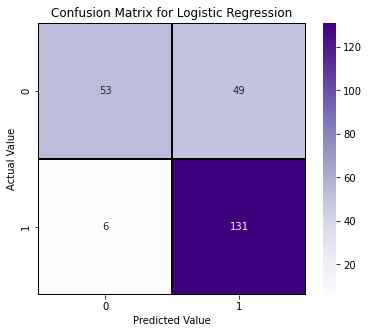

In [73]:
#Plotting the confusion Matrix,took predicted values from model without hyperparameter tuning

cm = confusion_matrix(y_test, pred_lr)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### b) Decision Tree Classifier

In [208]:
#Finding the best Randomstate:

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    pred = dt.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8117154811715481  on Random_state  78


In [226]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

In [210]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

0.803347280334728
[[ 92  18]
 [ 29 100]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       110
           1       0.85      0.78      0.81       129

    accuracy                           0.80       239
   macro avg       0.80      0.81      0.80       239
weighted avg       0.81      0.80      0.80       239



In [211]:
#HyperParameter Tuning for DTC

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

dtc= DecisionTreeClassifier()
dt_grid_param={'criterion':['gini','entropy'],
             'max_depth':np.arange(0,50),
             'max_features':["auto","sqrt","log2"],
             'max_leaf_nodes':[10,20,30],'min_samples_leaf': [5, 10, 20, 50, 100]}

gd_sr=GridSearchCV(estimator=dtc,param_grid=dt_grid_param,scoring='accuracy',cv=5,verbose=0)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(gd_sr)
print(gd_sr.best_score_)
print(gd_sr.best_estimator_)
print(gd_sr.best_params_)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy')
0.7701022012578618
DecisionTreeClassifier(max_depth=32, max_features='sqrt', max_leaf_nodes=30,
                       min_samples_leaf=5)
{'criterion': 'gini', 'max_depth': 32, 'max_features': 'sqrt', 'max_leaf_nodes': 30, 'min_samples_leaf': 5}


In [248]:
#Reinstating the tuned parameters:

dtc=DecisionTreeClassifier(criterion='gini',max_depth=32,max_features='sqrt',
                           max_leaf_nodes=30, min_samples_leaf=5)
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8117154811715481
[[ 80  30]
 [ 15 114]]
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       110
           1       0.79      0.88      0.84       129

    accuracy                           0.81       239
   macro avg       0.82      0.81      0.81       239
weighted avg       0.81      0.81      0.81       239



Our score is improved

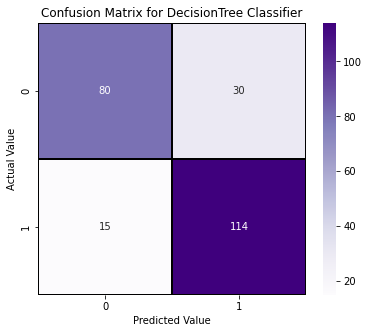

In [249]:
#Plotting the confusion Matrix

cm = confusion_matrix(y_test, preddtc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for DecisionTree Classifier')
plt.show()

### c) Support Vector Classifier

In [256]:
#Finding the best random state:

Accu=0
RS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    sv=SVC()
    sv.fit(x_train, y_train)
    pred = sv.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8075313807531381  on Random_state  146


In [257]:
#Calling each kernel by defining svmkernel:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state = RS)

def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [258]:
svmkernel('linear')

0.7615062761506276
[[ 64  57]
 [  0 118]]
              precision    recall  f1-score   support

           0       1.00      0.53      0.69       121
           1       0.67      1.00      0.81       118

    accuracy                           0.76       239
   macro avg       0.84      0.76      0.75       239
weighted avg       0.84      0.76      0.75       239



In [259]:
svmkernel('poly')

0.803347280334728
[[ 80  41]
 [  6 112]]
              precision    recall  f1-score   support

           0       0.93      0.66      0.77       121
           1       0.73      0.95      0.83       118

    accuracy                           0.80       239
   macro avg       0.83      0.81      0.80       239
weighted avg       0.83      0.80      0.80       239



In [260]:
svmkernel('rbf')

0.8075313807531381
[[ 84  37]
 [  9 109]]
              precision    recall  f1-score   support

           0       0.90      0.69      0.79       121
           1       0.75      0.92      0.83       118

    accuracy                           0.81       239
   macro avg       0.82      0.81      0.81       239
weighted avg       0.83      0.81      0.81       239



In [261]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
pred_svc=svc.predict(x_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.8075313807531381
[[ 84  37]
 [  9 109]]
              precision    recall  f1-score   support

           0       0.90      0.69      0.79       121
           1       0.75      0.92      0.83       118

    accuracy                           0.81       239
   macro avg       0.82      0.81      0.81       239
weighted avg       0.83      0.81      0.81       239



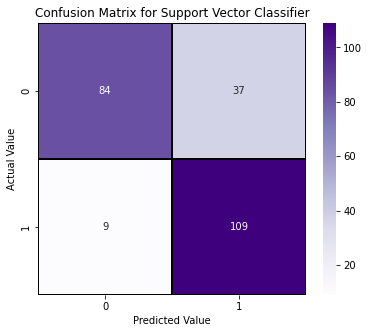

In [262]:
#Plotting the confusion Matrix

cm = confusion_matrix(y_test, pred_svc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

### d) Random Forest Classifier

In [263]:
#Finding the best random state

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8661087866108786  on Random_state  76


In [266]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8577405857740585
[[107  18]
 [ 16  98]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       125
           1       0.84      0.86      0.85       114

    accuracy                           0.86       239
   macro avg       0.86      0.86      0.86       239
weighted avg       0.86      0.86      0.86       239



In [271]:
#Hyper Parameter Tuning for Random Forest

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

rf=RandomForestClassifier()
rf_grid_param={"max_features": [1,3,10],
                "min_samples_split":[2,3,5,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[200,300],
                "criterion":["gini",'entropy']}

gd_sr=GridSearchCV(estimator=rf,param_grid=rf_grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'bootstrap': False, 'criterion': 'gini', 'max_features': 1, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 161}
0.8368160377358492


In [277]:
#Reinstating the tuned parameters:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =76)
rf=RandomForestClassifier(n_estimators=161,bootstrap=False,criterion='gini',
                         max_features=1,min_samples_leaf=3,min_samples_split=5)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8661087866108786
[[105  20]
 [ 12 102]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       125
           1       0.84      0.89      0.86       114

    accuracy                           0.87       239
   macro avg       0.87      0.87      0.87       239
weighted avg       0.87      0.87      0.87       239



#### Score is increased by 1%

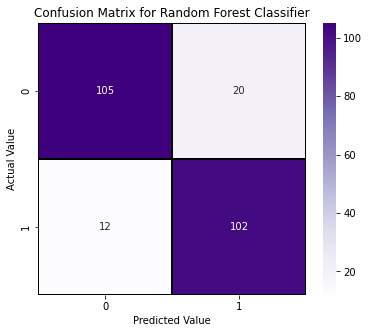

In [278]:
#Plotting the confusion Matrix

cm = confusion_matrix(y_test, predrf)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

### e) KNN Classifier

In [279]:
#Finding the best random state:

Accu=0
RS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8117154811715481  on Random_state  146


In [280]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8117154811715481
[[106  15]
 [ 30  88]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       121
           1       0.85      0.75      0.80       118

    accuracy                           0.81       239
   macro avg       0.82      0.81      0.81       239
weighted avg       0.82      0.81      0.81       239



In [281]:
#HyperParameter Tuning of knn:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

knn=KNeighborsClassifier()
knn_grid_param={"n_neighbors": np.arange(1, 25, 2),
                "weights": ["uniform","distance"],
                'metric' : ['minkowski','euclidean','manhattan'],
                'algorithm':['auto','ball_tree','kd_tree','brute']}

gd_sr=GridSearchCV(estimator=knn,param_grid=knn_grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
0.8203773584905661


In [282]:
#Reinstating the tuned parameters

knn=KNeighborsClassifier(n_neighbors=1,metric='manhattan',weights='uniform',algorithm='auto')
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8284518828451883
[[104  17]
 [ 24  94]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       121
           1       0.85      0.80      0.82       118

    accuracy                           0.83       239
   macro avg       0.83      0.83      0.83       239
weighted avg       0.83      0.83      0.83       239



#### Score increased by 1%

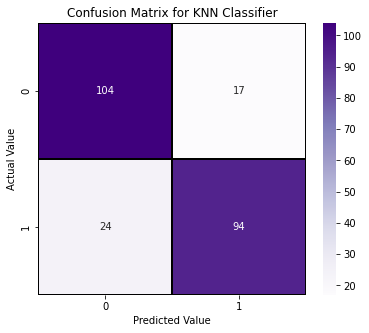

In [283]:
#Plotting the confusion Matrix

cm = confusion_matrix(y_test, predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

### f) Gradient Boosting Classifier

In [304]:
from sklearn.ensemble import GradientBoostingClassifier

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =None)

GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
predgb=GBC.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, predgb))
print('Confusion Matrix:',confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

Accuracy Score: 0.8410041841004184
Confusion Matrix: [[ 89  28]
 [ 10 112]]
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       117
           1       0.80      0.92      0.85       122

    accuracy                           0.84       239
   macro avg       0.85      0.84      0.84       239
weighted avg       0.85      0.84      0.84       239



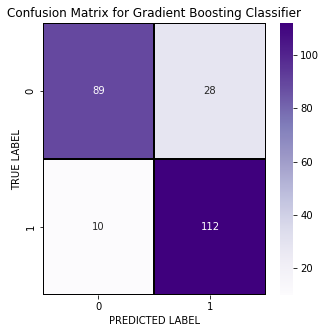

In [306]:
cm = confusion_matrix(y_test, predgb)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]


f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

## Cross Validation Score

In [307]:
score=cross_val_score(lr,x,y,cv=5)
score_a=score.mean()
print("Cross_Val_Score of LR:",score_a)

Cross_Val_Score of LR: 0.6859119496855345


In [308]:
score=cross_val_score(dtc,x,y,cv=5)
score_b=score.mean()
print("Cross_Val_Score of DTC:",score_b)

Cross_Val_Score of DTC: 0.7387814465408804


In [309]:
score=cross_val_score(svc,x,y,cv=5)
score_c=score.mean()
print("Cross_Val_Score of SVC:",score_c)

Cross_Val_Score of SVC: 0.7148506289308176


In [310]:
score=cross_val_score(rf,x,y,cv=5)
score_d=score.mean()
print("Cross_Val_Score of RF:",score_d)

Cross_Val_Score of RF: 0.8242374213836479


In [311]:
score=cross_val_score(knn,x,y,cv=5)
score_e=score.mean()
print("Cross_Val_Score of KNN:",score_e)

Cross_Val_Score of KNN: 0.8203773584905661


In [312]:
score=cross_val_score(GBC,x,y,cv=5)
score_f=score.mean()
print("Cross_Val_Score of Gradient Boosting:",score_f)

Cross_Val_Score of Gradient Boosting: 0.7765094339622642


Text(0.5, 1.0, 'Cross Validation Scores')

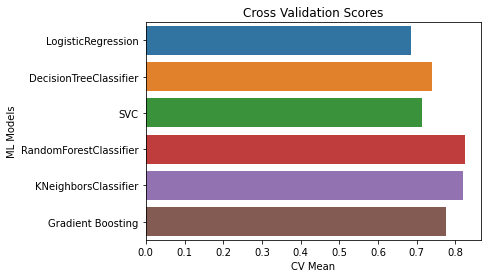

In [313]:
cv_result=[score_a,score_b,score_c,score_d,score_e,score_f]
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":[ "LogisticRegression",
            "DecisionTreeClassifier", "SVC","RandomForestClassifier","KNeighborsClassifier",
            "Gradient Boosting"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("CV Mean")
g.set_title("Cross Validation Scores")

### We have Random Forest with high Cross Val Score followed by KNeighbors Classifier and Gradient Boosting

Text(0.5, 1.0, 'Accuracy scores of different Models')

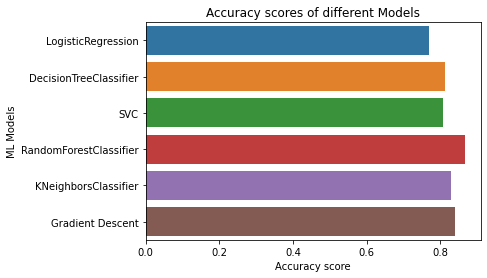

In [316]:
score_lr=0.7698744769874477
score_dtc=0.8117154811715481
score_svc=0.8075313807531381
score_rf=0.8661087866108786
score_knn=0.8284518828451883
score_gbc=0.8410041841004184

acc_result=[score_lr,score_dtc,score_svc,score_rf,score_knn,score_gbc]
acc_results = pd.DataFrame({"Accuracy Scores":acc_result, "ML Models":[ "LogisticRegression",
            "DecisionTreeClassifier", "SVC","RandomForestClassifier","KNeighborsClassifier",
            "Gradient Descent"]})

g = sns.barplot("Accuracy Scores", "ML Models", data = acc_results)
g.set_xlabel("Accuracy score")
g.set_title("Accuracy scores of different Models")

### We have Random Forest as highest accuracy Score followed by Gradient Boosting and KNN Classifier.

#### Lets Check the AUC-ROC Curve as well and determine the final Model

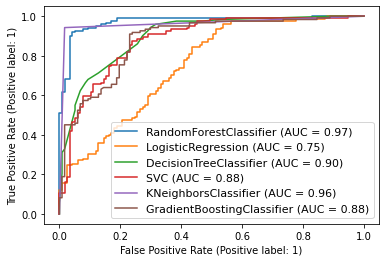

In [317]:
# Plotting AUC-ROC Curve for all the models used here 

from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(rf,x_test,y_test)
plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)    
plot_roc_curve(dtc,x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GBC, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

## From All above plots, We can see Random Forest is the best Model

# The Final Model

In [325]:
#Final model as Random Forest
#{'bootstrap': False, 'criterion': 'gini', 'max_features': 1, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 161}

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =76)
Final_Model=RandomForestClassifier(n_estimators=161,bootstrap=False,criterion='gini',
                         max_features=1,min_samples_leaf=3,min_samples_split=5)
Final_Model.fit(x_train,y_train)
predrf=Final_Model.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8702928870292888
[[105  20]
 [ 11 103]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       125
           1       0.84      0.90      0.87       114

    accuracy                           0.87       239
   macro avg       0.87      0.87      0.87       239
weighted avg       0.87      0.87      0.87       239



## AUC-ROC Curve

In [326]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob=Final_Model.predict_proba(x_test)[:,1]
y_pred_prob

array([0.52919316, 0.53686471, 0.69164562, 0.0834064 , 0.687179  ,
       0.42385382, 0.5561968 , 0.41872835, 0.57760941, 0.74287935,
       0.73979998, 0.69868729, 0.35871502, 0.73540376, 0.65458841,
       0.09084466, 0.68372679, 0.21198089, 0.72368293, 0.08036329,
       0.69106637, 0.60116296, 0.23262542, 0.79245415, 0.66754482,
       0.81969625, 0.58852457, 0.58991178, 0.53130895, 0.28867467,
       0.65752491, 0.70392783, 0.14172024, 0.60679585, 0.59664895,
       0.41857162, 0.13454391, 0.80991665, 0.15812714, 0.47971394,
       0.26348283, 0.64946589, 0.4304556 , 0.70942569, 0.76713533,
       0.65723759, 0.68801486, 0.43470252, 0.2929997 , 0.53943848,
       0.16423115, 0.52074848, 0.15388894, 0.16638308, 0.35594298,
       0.48105896, 0.48927384, 0.68105866, 0.11205997, 0.25011809,
       0.42542514, 0.294084  , 0.4849108 , 0.68431423, 0.17888557,
       0.89242545, 0.69062061, 0.66515526, 0.11572984, 0.70076072,
       0.69954952, 0.09883579, 0.33646376, 0.76269337, 0.34577

In [327]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [328]:
fpr

array([0.   , 0.   , 0.   , 0.008, 0.008, 0.016, 0.016, 0.024, 0.024,
       0.032, 0.032, 0.056, 0.056, 0.072, 0.072, 0.08 , 0.08 , 0.088,
       0.088, 0.096, 0.096, 0.112, 0.112, 0.12 , 0.12 , 0.128, 0.128,
       0.144, 0.144, 0.152, 0.152, 0.16 , 0.16 , 0.192, 0.192, 0.248,
       0.248, 0.272, 0.272, 0.28 , 0.28 , 0.304, 0.304, 0.408, 0.408,
       0.68 , 0.68 , 0.688, 0.688, 0.744, 0.744, 0.904, 0.92 , 1.   ])

In [329]:
tpr

array([0.        , 0.00877193, 0.25438596, 0.25438596, 0.28947368,
       0.28947368, 0.29824561, 0.29824561, 0.38596491, 0.38596491,
       0.40350877, 0.40350877, 0.43859649, 0.43859649, 0.5       ,
       0.5       , 0.63157895, 0.63157895, 0.64912281, 0.64912281,
       0.70175439, 0.70175439, 0.78070175, 0.78070175, 0.79824561,
       0.79824561, 0.85964912, 0.85964912, 0.86842105, 0.86842105,
       0.88596491, 0.88596491, 0.90350877, 0.90350877, 0.9122807 ,
       0.9122807 , 0.93859649, 0.93859649, 0.94736842, 0.94736842,
       0.95614035, 0.95614035, 0.96491228, 0.96491228, 0.97368421,
       0.97368421, 0.98245614, 0.98245614, 0.99122807, 0.99122807,
       1.        , 1.        , 1.        , 1.        ])

In [330]:
thresholds

array([1.89242545, 0.89242545, 0.74605354, 0.74287935, 0.73587088,
       0.73540376, 0.73283368, 0.72368293, 0.70392783, 0.70076072,
       0.69954952, 0.69106637, 0.68431423, 0.68105866, 0.65382069,
       0.65307088, 0.61882442, 0.61304886, 0.60926592, 0.60806209,
       0.59975337, 0.59664895, 0.57602532, 0.57496877, 0.5561968 ,
       0.55616234, 0.53260046, 0.53130895, 0.52919316, 0.52851955,
       0.52074848, 0.50908729, 0.50449052, 0.48927384, 0.48896877,
       0.47952808, 0.46999915, 0.46280753, 0.45436813, 0.45052014,
       0.43470252, 0.42542514, 0.42385382, 0.35680323, 0.35594298,
       0.21024706, 0.19743075, 0.19009672, 0.18860653, 0.16638308,
       0.16552229, 0.11582903, 0.11572984, 0.08036329])

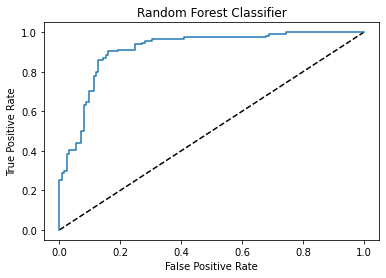

In [331]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [332]:
auc_score=roc_auc_score(y_test,Final_Model.predict(x_test))
print((auc_score)*100)

87.17543859649122


### We get the final Score of 87.18%

# Saving The Final Model

In [333]:
import joblib
joblib.dump(Final_Model,'Loan_Status_rf.pkl')

['Loan_Status_rf.pkl']

<AxesSubplot:>

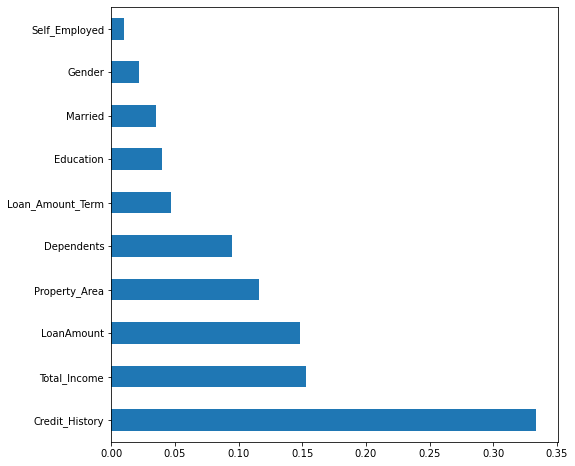

In [335]:
#Checking Feature Importance with Random Forest Model

feat_importances = pd.Series(Final_Model.feature_importances_, index=x.columns)
feat_importances.nlargest(100).plot(kind='barh',figsize=(8,8))

* Credit History is the most important feauture. About 30-35% of Loan Approval depend on credit History.
* Other Next Important factor is Total_Income just followed by Loan Amount. About 15-17% of Loan Approval depend on these factors.
* Least Important factor is Self-Employed or not and Gender followed by Marital Status.

### From the feature Importance table, we can see that Credit_History, Total_Income and Loan Amount are the most important features. Thus, Our Hypothesis were proved to be True.

## Predictions

In [349]:
# Loading the saved model
model=joblib.load("Loan_Status_rf.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1])

In [350]:
base = pd.DataFrame()
base["actual"] = y_test
base["predictions"] = prediction
base

,actual,predictions
178,1,1
151,1,1
599,0,1
791,0,0
356,1,1
...,...,...
514,1,1
61,0,0
492,1,1
672,0,0


### We have almost equal predicted and actual value. Lets confirm it

In [351]:
#Adding another column of thier difference. 

base['difference']=base['actual']-base['predictions']
base

,actual,predictions,difference
178,1,1,0
151,1,1,0
599,0,1,-1
791,0,0,0
356,1,1,0
...,...,...,...
514,1,1,0
61,0,0,0
492,1,1,0
672,0,0,0


In [352]:
#If 0 then actual and predicted are same. else its different

print(base['difference'].value_counts())

 0    208
-1     20
 1     11
Name: difference, dtype: int64


#### We have 208 same values and 31 different values. Lets check the percentage of actual versus predicted

In [348]:
a=(31/208)*100
a

14.903846153846153

## We have 14.9%% error with this model. Although its not Very much accurate, This is the best score we can get from this Model.